# A. PROBLEM

1. Lakukan hypothesis testing terhadap dataset 
2. Ambil kesimpulan dari hasil analisis

# B. IMPORT LIBRARY

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# C. DATA LOADING

In [191]:
dataku = pd.read_csv('covid_19_indonesia_time_series_all.csv')
dataku

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.00,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21754,12/2/2021,ID-SA,Sulawesi Utara,2,0,0,2,34715,1056,33566,...,1.259638,0.76,13140.24,0.00,399.71,39.97,3.04%,96.69%,NaN,1.0
21755,12/2/2021,ID-SB,Sumatera Barat,4,0,0,4,89849,2152,87605,...,-0.850253,0.72,16279.22,0.00,389.91,38.99,2.40%,97.50%,4.00,1.0
21756,12/2/2021,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,4.00,1.0
21757,12/2/2021,ID-SU,Sumatera Utara,4,0,1,3,106045,2889,103061,...,2.191894,0.27,7129.13,0.00,194.22,19.42,2.72%,97.19%,1.00,1.0


# D. DATA CLEANING

*Menyalin data asli*

In [192]:
covid = dataku.copy()

*Melihat informasi dasar dari data*

In [193]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

*Mengubah tipe date menjadi datetime*

In [194]:
covid['Date'] =  pd.to_datetime(covid['Date'])

*Melihat Data Yang Missing Value*

In [195]:
covid[covid.columns[(covid.isna().any())]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City or Regency              0 non-null      float64
 1   Province                     21117 non-null  object 
 2   Island                       21117 non-null  object 
 3   Time Zone                    21117 non-null  object 
 4   Special Status               3123 non-null   object 
 5   Total Cities                 21145 non-null  float64
 6   Total Urban Villages         21142 non-null  float64
 7   Total Rural Villages         21117 non-null  float64
 8   Growth Factor of New Cases   20572 non-null  float64
 9   Growth Factor of New Deaths  19292 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.7+ MB


*Heandling Missing Value*

In [196]:
drop_columns = covid.drop(['City or Regency','Special Status','Growth Factor of New Cases'], axis=1, inplace=True)     

covid['Province'] = covid['Province'].fillna(covid['Province'].mode()[0])
covid['Island'] = covid['Island'].fillna(covid['Island'].mode()[0])
covid['Time Zone'] = covid['Time Zone'].fillna(covid['Time Zone'].mode()[0])

covid['Total Cities'] = covid['Total Urban Villages'].fillna(covid['Total Urban Villages'].median())
covid['Total Urban Villages'] = covid['Total Urban Villages'].fillna(covid['Total Urban Villages'].median())
covid['Total Rural Villages'] = covid['Total Rural Villages'].fillna(covid['Total Rural Villages'].median())
covid['Growth Factor of New Deaths'] = covid['Growth Factor of New Deaths'].fillna(covid['Growth Factor of New Deaths'].median())

*Melihat Presentase Missing Value*

In [197]:
cek = pd.DataFrame(covid.isnull().sum(), columns=['missing values'])
cek['% missing_values'] = (cek/len(covid)).round(2)*100
cek

,missing values,% missing_values
Date,0,0.0
Location ISO Code,0,0.0
Location,0,0.0
New Cases,0,0.0
New Deaths,0,0.0
New Recovered,0,0.0
New Active Cases,0,0.0
Total Cases,0,0.0
Total Deaths,0,0.0
Total Recovered,0,0.0


In [198]:
covid.shape

(21759, 35)

# E. DATA EKSPLORATION

*Melihat Deskripsi Data*

In [199]:
covid.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Total Regencies,Total Cities,...,Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Deaths
count,21759.000000,21759.000000,21759.000000,21759.000000,2.175900e+04,21759.000000,2.175900e+04,21759.000000,21759.000000,21759.000000,...,2.175900e+04,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000,21759.000000
mean,391.293580,13.220415,377.310998,0.762167,8.525997e+04,2648.289352,7.671260e+04,5899.079002,24.160256,499.276943,...,1.547817e+07,744.989784,113.680803,-2.731868,29.393033,6183.650588,0.852727,163.542156,16.354192,1.065739
std,2074.551043,76.482617,1999.062563,937.213509,3.685133e+05,11776.011067,3.403957e+05,27518.102431,68.708265,1409.807608,...,4.483574e+07,2743.209719,9.857587,3.608264,69.941090,10288.123342,2.277310,254.195761,25.419595,1.486509
min,0.000000,0.000000,0.000000,-25725.000000,1.000000e+00,0.000000,0.000000e+00,-2306.000000,1.000000,35.000000,...,6.484070e+05,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,4.000000,-16.000000,1.822500e+03,50.000000,1.038500e+03,182.000000,7.000000,99.000000,...,1.999539e+06,47.790000,106.109004,-6.204699,1.750000,415.915000,0.000000,10.880000,1.090000,0.750000
50%,41.000000,1.000000,31.000000,0.000000,1.078000e+04,283.000000,8.745000e+03,919.000000,11.000000,175.000000,...,4.216171e+06,103.840000,113.417654,-2.461746,8.160000,2727.460000,0.180000,73.550000,7.350000,1.000000
75%,151.000000,5.000000,143.000000,27.000000,3.646450e+04,1050.000000,3.293250e+04,2607.500000,18.000000,332.000000,...,9.095591e+06,262.700000,121.201093,0.212037,26.260000,7374.120000,0.750000,195.850000,19.585000,1.000000
max,56757.000000,2069.000000,48832.000000,36726.000000,4.257243e+06,143858.000000,4.105680e+06,574135.000000,416.000000,8488.000000,...,2.651855e+08,16334.310000,138.696030,4.225615,1348.130000,79663.790000,63.800000,1533.980000,153.400000,134.500000


*Melihat Kolom Pada Data*

In [200]:
covid.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level', 'Province',
       'Country', 'Continent', 'Island', 'Time Zone', 'Total Regencies',
       'Total Cities', 'Total Districts', 'Total Urban Villages',
       'Total Rural Villages', 'Area (km2)', 'Population',
       'Population Density', 'Longitude', 'Latitude', 'New Cases per Million',
       'Total Cases per Million', 'New Deaths per Million',
       'Total Deaths per Million', 'Total Deaths per 100rb',
       'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Deaths'],
      dtype='object')

In [201]:
covid['Location'].unique()

array(['DKI Jakarta', 'Indonesia', 'Riau', 'Jawa Barat', 'Banten',
       'Jawa Tengah', 'Sulawesi Tenggara', 'Bali', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Timur',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Maluku', 'Papua',
       'Maluku Utara', 'Sumatera Selatan', 'Aceh', 'Kalimantan Tengah',
       'Lampung', 'Sulawesi Tengah', 'Sulawesi Utara', 'Sumatera Barat',
       'Papua Barat', 'Kalimantan Utara', 'Sulawesi Barat',
       'Kalimantan Barat', 'Kalimantan Selatan',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Nusa Tenggara Barat',
       'Nusa Tenggara Timur', 'Gorontalo'], dtype=object)

In [202]:
covid['Location Level'].unique()

array(['Province', 'Country'], dtype=object)

In [203]:
indonesia = covid[covid['Location Level'] == 'Country'].sort_values(by='Date').reset_index(drop=True)
indonesia

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Deaths
0,2020-03-02,IDN,Indonesia,2,0,0,2,2,0,0,...,113.921327,-0.789275,0.01,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00
1,2020-03-03,IDN,Indonesia,0,0,0,0,2,0,0,...,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00
2,2020-03-04,IDN,Indonesia,0,0,0,0,2,0,0,...,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00
3,2020-03-05,IDN,Indonesia,0,0,0,0,2,0,0,...,113.921327,-0.789275,0.00,0.01,0.00,0.00,0.00,0.00%,0.00%,1.00
4,2020-03-06,IDN,Indonesia,2,0,0,2,4,0,0,...,113.921327,-0.789275,0.01,0.02,0.00,0.00,0.00,0.00%,0.00%,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,2021-11-29,IDN,Indonesia,176,11,419,-254,4256112,143819,4104333,...,113.921327,-0.789275,0.66,16049.56,0.04,542.33,54.23,3.38%,96.43%,11.00
638,2021-11-30,IDN,Indonesia,297,11,324,-38,4256409,143830,4104657,...,113.921327,-0.789275,1.12,16050.68,0.04,542.38,54.24,3.38%,96.43%,1.00
639,2021-12-01,IDN,Indonesia,278,10,307,-39,4256687,143840,4104964,...,113.921327,-0.789275,1.05,16051.73,0.04,542.41,54.24,3.38%,96.44%,0.91
640,2021-12-02,IDN,Indonesia,311,10,388,-87,4256998,143850,4105352,...,113.921327,-0.789275,1.17,16052.91,0.04,542.45,54.25,3.38%,96.44%,1.00


In [204]:
province = covid[covid['Location Level']=='Province'].sort_values(by='Date').reset_index(drop=True)
province

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Deaths
0,2020-03-01,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,106.836118,-6.204699,0.18,3.60,0.00,1.84,0.18,51.28%,105.13%,1.0
1,2020-03-02,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,106.836118,-6.204699,0.18,3.78,0.00,1.84,0.18,48.78%,100.00%,1.0
2,2020-03-02,ID-RI,Riau,1,0,0,1,2,0,3,...,101.805109,0.511648,0.16,0.33,0.00,0.00,0.00,0.00%,150.00%,1.0
3,2020-03-03,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,106.836118,-6.204699,0.18,3.96,0.00,1.84,0.18,46.51%,95.35%,1.0
4,2020-03-03,ID-JB,Jawa Barat,1,1,0,0,1,1,8,...,107.603708,-6.920432,0.02,0.02,0.02,0.02,0.00,100.00%,800.00%,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21112,2021-12-02,ID-BA,Bali,15,1,1,13,114233,4046,110003,...,115.131714,-8.369472,3.56,27094.01,0.24,959.64,95.96,3.54%,96.30%,1.0
21113,2021-12-02,ID-AC,Aceh,2,0,0,2,38416,2066,36333,...,96.910522,4.225615,0.38,7321.16,0.00,393.73,39.37,5.38%,94.58%,1.0
21114,2021-12-02,ID-SS,Sumatera Selatan,4,0,0,4,59937,3071,56830,...,104.169465,-3.216212,0.49,7293.78,0.00,373.71,37.37,5.12%,94.82%,1.0
21115,2021-12-02,ID-KI,Kalimantan Timur,7,0,2,5,158245,5449,152714,...,116.468440,0.453858,1.97,44548.56,0.00,1533.98,153.40,3.44%,96.50%,1.0


# Hypothesis Testing

**Single Sample Hypothesis Testing**

Rata-rata kasus harian covid di Indonesia adalah 10134 selama satu tahun terakhir. Dan rata-rata 6631 kasus baru perhari. Apakah ini menunjukan jumlah kasus harian covid berkurang secara signifikan?

In [205]:
sampel_mean = indonesia['New Cases'].iloc[-365:].mean()
population_mean = indonesia['New Cases'].mean()

print(f'Rata-rata kasus covid untuk 200 hari terakhir = {sampel_mean:.0f}')
print(f'Rata-rata kasus covid untuk populasi = {population_mean:.0f}')



Rata-rata kasus covid untuk 200 hari terakhir = 10135
Rata-rata kasus covid untuk populasi = 6631


Untuk mengecek apakah kasus covid berkurang secara signifikan atau tidak, kami menetapkan tingkat signifikasi 0.05 untuk menguji variabel dan membandingkan sampel (data satu tahun terakhir) dan populasi.

Our hypothesis on this case:

**H0: μ <= \$6631**

**H1: μ > \$6631**

In [206]:
indonesia[['Date','New Cases']].iloc[-365:]

,Date,New Cases
277,2020-12-04,5803
278,2020-12-05,6027
279,2020-12-06,6089
280,2020-12-07,5754
281,2020-12-08,5292
...,...,...
637,2021-11-29,176
638,2021-11-30,297
639,2021-12-01,278
640,2021-12-02,311


In [207]:
t_stat, p_val = stats.ttest_1samp(indonesia['New Cases'].iloc[-365:], population_mean)
print(f'p-value {p_val/2}')
print(f't-statistic : {t_stat}')

p-value 4.940559142864925e-09
t-statistic : 5.86880499217398


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


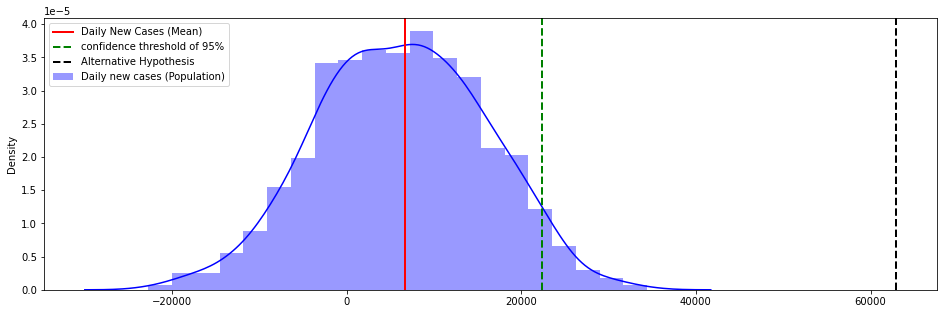

In [208]:
daily_new_pop = np.random.normal(indonesia['New Cases'].mean(), indonesia['New Cases'].std(), 1000)

ci = stats.norm.interval(0.90, indonesia['New Cases'].mean(), indonesia['New Cases'].std())

plt.figure(figsize=(16,5))
sns.distplot(daily_new_pop, label='Daily new cases (Population)', color='blue')
plt.axvline(indonesia['New Cases'].mean(), color='red', linewidth=2, label='Daily New Cases (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_new_pop.mean() + t_stat*daily_new_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Karena p-value kurang dari 0.05 maka kami gagal terima H0 dan menyimpulkan bahwa kasus baru covid di Indonesia telah menurun secara signifikan dibandingkan dengan populasi

**Two Sampels Independent Two Tailed Hypothesis Testing**

In [209]:
province['Location'].unique()

array(['DKI Jakarta', 'Riau', 'Jawa Barat', 'Banten', 'Jawa Tengah',
       'Sulawesi Tenggara', 'Bali', 'Kalimantan Timur',
       'Daerah Istimewa Yogyakarta', 'Sumatera Utara', 'Jawa Timur',
       'Kepulauan Riau', 'Sulawesi Selatan', 'Jambi', 'Papua', 'Maluku',
       'Sumatera Selatan', 'Maluku Utara', 'Sulawesi Utara',
       'Sumatera Barat', 'Sulawesi Tengah', 'Lampung', 'Aceh',
       'Kalimantan Tengah', 'Papua Barat', 'Sulawesi Barat',
       'Kalimantan Utara', 'Kalimantan Barat',
       'Kepulauan Bangka Belitung', 'Kalimantan Selatan',
       'Nusa Tenggara Barat', 'Bengkulu', 'Nusa Tenggara Timur',
       'Gorontalo'], dtype=object)

Kami ingin memeriksa apakah rata-rata kasus covid dua daerah berbeda secara signifikan atau tidak menggunakan Two Sampels Independent Tailed Test. Kami akan memilik sampel Sulawesi Tenggara dan Sulawesi Utara

In [210]:
daily_cases_sulteng = province[province['Location']=='Sulawesi Tenggara'][['New Cases']]
daily_cases_sulut = province[province['Location']=='Sulawesi Utara'][['New Cases']]

print(f'Rata-rata kasus covid di Sulteng : {daily_cases_sulteng.mean()}')
print(f'Rata-rata kasus covid di Sulut : {daily_cases_sulut.mean()}')


Rata-rata kasus covid di Sulteng : New Cases    31.848341
dtype: float64
Rata-rata kasus covid di Sulut : New Cases    56.264182
dtype: float64


Our hypothesis on this case:

**H0: μ_Sulawesi Tenggara = μ_Sulawesi Utara**  

**H1: μ_Sulawesi Tenggara != μ_Sulawesi Utara** 

In [211]:
t_stat, p_val = stats.ttest_ind(daily_cases_sulteng,daily_cases_sulut)
print('P-value:',p_val[0]) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat[0])

P-value: 4.516440416909534e-09
t-statistics: -5.9058988047962355


In [212]:
daily_cases_sulteng['New Cases'].mean()

31.848341232227487

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


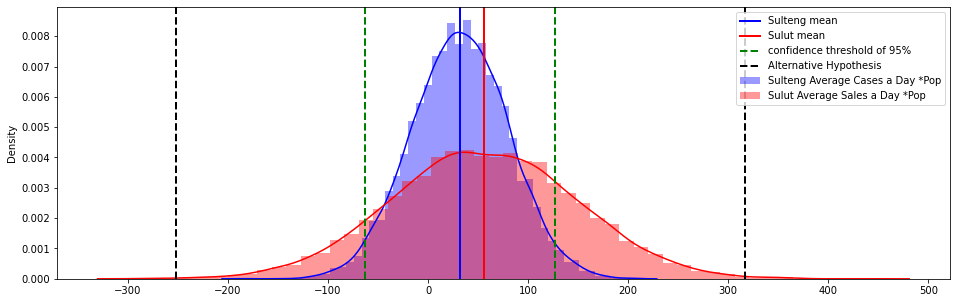

In [213]:
sulteng_pop = np.random.normal(daily_cases_sulteng['New Cases'].mean(),daily_cases_sulteng['New Cases'].std(),10000)
sulut_pop = np.random.normal(daily_cases_sulut['New Cases'].mean(),daily_cases_sulut['New Cases'].std(),10000)

ci = stats.norm.interval(0.95, daily_cases_sulteng['New Cases'].mean(), daily_cases_sulteng['New Cases'].std())
plt.figure(figsize=(16,5))
sns.distplot(sulteng_pop, label='Sulteng Average Cases a Day *Pop',color='blue')
sns.distplot(sulut_pop, label='Sulut Average Sales a Day *Pop',color='red')

plt.axvline(daily_cases_sulteng['New Cases'].mean(), color='blue', linewidth=2, label='Sulteng mean')
plt.axvline(daily_cases_sulut['New Cases'].mean(), color='red',  linewidth=2, label='Sulut mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(sulteng_pop.mean()+t_stat[0]*sulteng_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(sulteng_pop.mean()-t_stat[0]*sulteng_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Berdasarkan hasil diatas, kita dapat menyimpulkan bahwa kita gagal menerima H0 bahwa antara Sulawesi Tenggara dan Sulawesi Utara berbeda secara signifikan dalam rata-rata kasus covid per hari